In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats.stats import pearsonr
train = pd.read_csv(r"C:\Users\Utente\Desktop\Train_HR_Employee_Attrition.csv",
                    delimiter = ",",
                    na_values = ":",
                    usecols = ["Age", "Attrition", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "Over18", "OverTime", "PercentSalaryHike", "PerformanceRating", "RelationshipSatisfaction", "StandardHours", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"])
train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,NaN,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


In [3]:
train.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [4]:
train.tail(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,NaN,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1
1175,48.0,No,Travel_Frequently,1431,Research & Development,14,3,Medical,2,Female,...,3,80.0,0,0,NaN,1,22.0,0,0,0


In [5]:
len(train) #sample size

1176

In [7]:
train.values #values

array([[52.0, 'No', 'Travel_Rarely', ..., 7, 2, 13],
       [36.0, 'No', 'Travel_Rarely', ..., 8, 1, 6],
       [nan, 'No', 'Travel_Frequently', ..., 5, 1, 2],
       ...,
       [33.0, 'No', nan, ..., 2, 0, 3],
       [45.0, 'No', 'Non-Travel', ..., 4, 0, 1],
       [48.0, 'No', 'Travel_Frequently', ..., 0, 0, 0]], dtype=object)

In [8]:
train.columns #columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [9]:
X = train.values #type of the values
type(X)

numpy.ndarray

In [10]:
X.shape #shape of the array

(1176, 33)

In [11]:
train.dtypes #type of the attributes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

In [12]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

In [13]:
train.describe() #basic descriptive statistics

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,963.000000,...,1176.000000,606.0,1176.000000,1176.000000,943.000000,1176.000000,1116.000000,1176.000000,1176.000000,1176.000000
mean,37.199000,803.650510,9.210034,2.884354,2.715986,66.299320,2.735544,2.021259,2.702381,6565.946002,...,2.702381,80.0,0.783163,11.019558,2.827147,2.755952,6.926523,4.188776,2.171769,4.107993
std,9.015802,406.683045,8.097024,1.016574,1.088876,20.266116,0.716228,1.069686,1.101578,4710.625603,...,1.092268,0.0,0.851385,7.694848,1.273120,0.707984,6.063193,3.637405,3.189785,3.601097
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,460.500000,2.000000,2.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2969.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,804.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4969.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1169.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8585.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
train.isnull().any() #null values

Age                          True
Attrition                   False
BusinessTravel               True
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                       True
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome                True
MonthlyRate                 False
NumCompaniesWorked          False
Over18                       True
OverTime                    False
PercentSalaryHike           False
PerformanceRating            True
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance             False
YearsAtCompany

In [15]:
train.isnull().sum() #number of null values for each attribute

Age                         176
Attrition                     0
BusinessTravel              107
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                       59
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               213
MonthlyRate                   0
NumCompaniesWorked            0
Over18                      372
OverTime                      0
PercentSalaryHike             0
PerformanceRating           138
RelationshipSatisfaction      0
StandardHours               570
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       233
WorkLifeBalance               0
YearsAtCompany               60
YearsInCurrentRole            0
YearsSin

In [16]:
train.corr(method ='pearson') #Pearson correlation

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.027961,0.008081,0.005951,0.026259,0.045007,0.005358,0.040556,-0.056664,0.496275,...,0.028624,NaN,0.033101,0.023891,-0.017973,0.011215,0.330892,0.039994,0.006215,0.012462
DailyRate,-0.027961,1.000000,0.014447,-0.014759,0.047369,0.007709,0.049508,-0.009872,0.044478,-0.030414,...,0.002869,NaN,0.040397,0.015554,-0.018077,-0.046024,-0.016744,0.004506,-0.032954,-0.015054
DistanceFromHome,0.008081,0.014447,1.000000,0.021564,0.000980,0.037306,-0.009932,0.020217,0.004533,0.000690,...,0.013618,NaN,0.072908,0.008690,-0.006520,-0.026830,0.044862,0.014401,0.004995,0.006839
Education,0.005951,-0.014759,0.021564,1.000000,-0.054301,0.007589,0.039782,0.086789,-0.036841,0.008964,...,0.004234,NaN,0.001485,0.140639,-0.006407,0.025790,0.022576,0.053092,0.032377,0.066882
EnvironmentSatisfaction,0.026259,0.047369,0.000980,-0.054301,1.000000,-0.043890,-0.007997,0.036607,-0.015897,-0.053153,...,0.016884,NaN,0.020726,0.030425,-0.008389,0.034762,-0.016126,0.030739,0.036111,0.014774
HourlyRate,0.045007,0.007709,0.037306,0.007589,-0.043890,1.000000,0.032840,-0.043203,-0.088872,-0.014530,...,0.004297,NaN,0.026602,-0.017562,-0.013365,-0.015012,0.007165,-0.027806,-0.038817,-0.025352
JobInvolvement,0.005358,0.049508,-0.009932,0.039782,-0.007997,0.032840,1.000000,-0.022649,-0.025413,0.011389,...,0.054873,NaN,0.042657,-0.022687,-0.023995,-0.026684,-0.028960,0.002518,-0.032253,0.022631
JobLevel,0.040556,-0.009872,0.020217,0.086789,0.036607,-0.043203,-0.022649,1.000000,-0.007627,0.014883,...,-0.009148,NaN,0.003197,0.774492,-0.001041,0.031580,0.014837,0.402092,0.348876,0.391790
JobSatisfaction,-0.056664,0.044478,0.004533,-0.036841,-0.015897,-0.088872,-0.025413,-0.007627,1.000000,0.019431,...,-0.024167,NaN,-0.011700,-0.025719,0.041760,-0.032101,-0.012542,0.002989,-0.034122,-0.032654
MonthlyIncome,0.496275,-0.030414,0.000690,0.008964,-0.053153,-0.014530,0.011389,0.014883,0.019431,1.000000,...,-0.019264,NaN,-0.032897,-0.005489,0.013194,0.027635,0.513209,0.006859,-0.021624,-0.023804


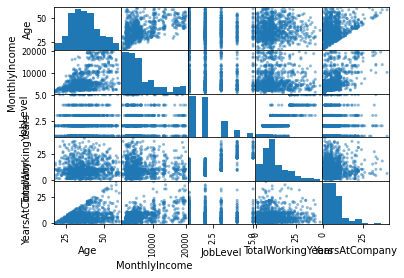

In [17]:
pd.plotting.scatter_matrix(train[['Age', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears','YearsAtCompany']])
plt.show()      
###questa matrice non so quanto sia utile

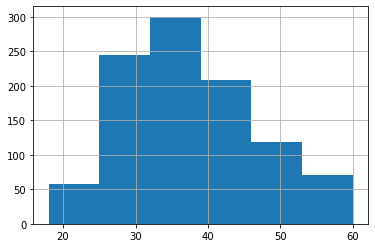

In [18]:
train['Age'].hist(bins=6) #histogram of Age 
plt.show()

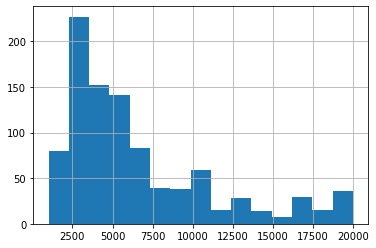

In [19]:
train['MonthlyIncome'].hist(bins=15) #Histogram of MonthlyIncome
plt.show()

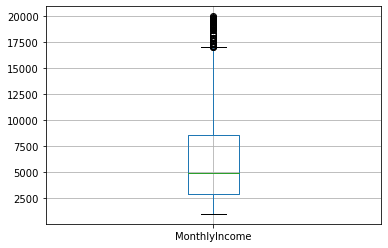

In [20]:
boxplot = train.boxplot(column=['MonthlyIncome']) #boxplot of MonthlyIncome

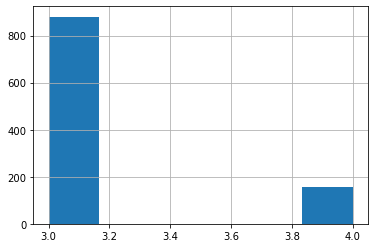

In [21]:
##Histogram of PerformanceRating. Se sono solo due valori, può essere trasformata in integer
train['PerformanceRating'].hist(bins=6) 
plt.show()

In [22]:
train[['PerformanceRating']].head()

,PerformanceRating
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0


In [23]:
train[['PerformanceRating']].tail(5)

,PerformanceRating
1171,3.0
1172,3.0
1173,NaN
1174,3.0
1175,NaN


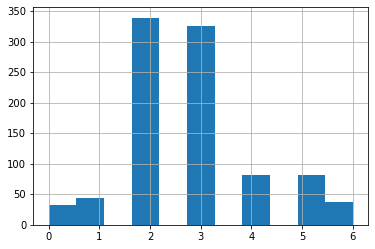

In [24]:
##Anche questa è ordinale, bisogna cambiarne il type
train['TrainingTimesLastYear'].hist(bins=11) #Histogram of TrainingTimeLastYear 
plt.show()

In [25]:
train[['TrainingTimesLastYear']].head()

,TrainingTimesLastYear
0,2.0
1,3.0
2,4.0
3,1.0
4,NaN


In [26]:
train[['TrainingTimesLastYear']].tail(5)

,TrainingTimesLastYear
1171,3.0
1172,2.0
1173,2.0
1174,2.0
1175,NaN


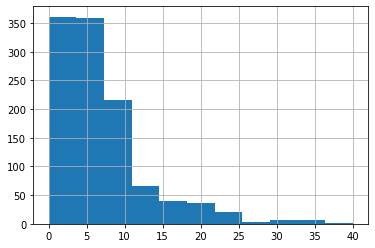

In [27]:
train['YearsAtCompany'].hist(bins=11) #Histogram of YearsAtCompany
plt.show()

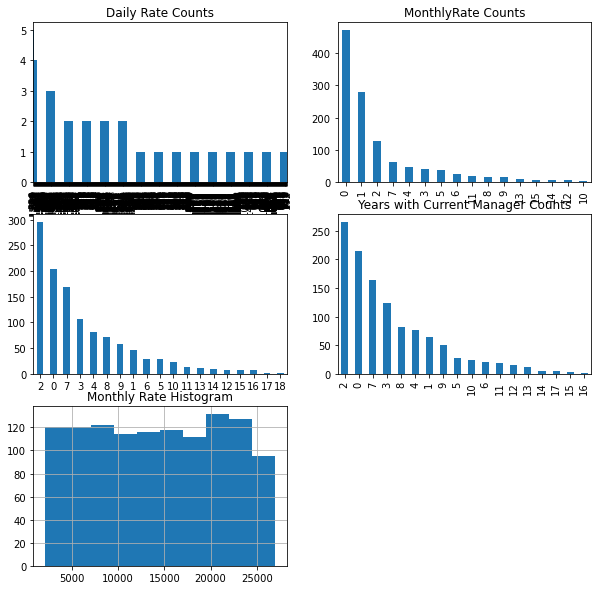

In [31]:
###Ho fatto il boxplot di queste variabili, ma non sono convinta che sia la soluzione migliore

# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

# Plot DailyRate counts
plt.subplot2grid(fig_dims, (0, 0))
train['DailyRate'].value_counts().plot(kind='bar', 
                                   title='Daily Rate Counts')

# Plot MonthlyRate counts
plt.subplot2grid(fig_dims, (0, 1))
train['YearsSinceLastPromotion'].value_counts().plot(kind='bar', title='MonthlyRate Counts')

# Plot YearsInCurrentRole counts
plt.subplot2grid(fig_dims, (1, 0))
train['YearsInCurrentRole'].value_counts().plot(kind='bar', title='Years in Current Role Counts')
plt.xticks(rotation=0)

# Plot YearsWitCurrManager counts
plt.subplot2grid(fig_dims, (1, 1))
train['YearsWithCurrManager'].value_counts().plot(kind='bar', title='Years with Current Manager Counts')

# Plot YearsSinceLastPromotion histogram
plt.subplot2grid(fig_dims, (2, 0))
train['MonthlyRate'].hist()
plt.title('Monthly Rate Histogram')

plt.show()

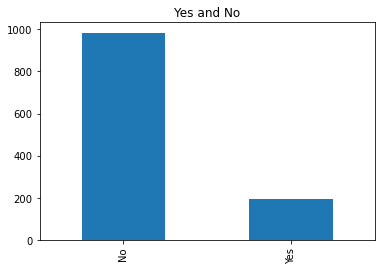

In [29]:
train['Attrition'].value_counts().plot(kind='bar', 
                                   title='Yes and No') #barplot of Attrition
plt.show()

In [32]:
my_tab = pd.crosstab(index=train["Attrition"],  # Make a crosstab
                     columns="count")                

my_tab

col_0,count
Attrition,
No,984
Yes,192


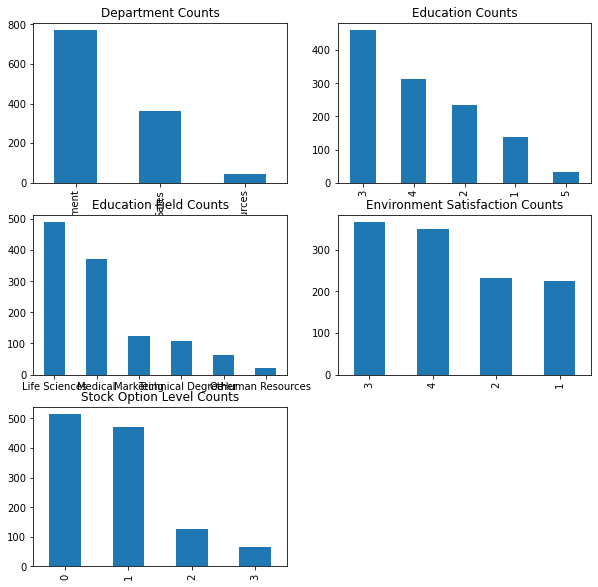

In [33]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

# Plot Department counts
plt.subplot2grid(fig_dims, (0, 0))
train['Department'].value_counts().plot(kind='bar', 
                                   title='Department Counts')

# Plot Education Counts
plt.subplot2grid(fig_dims, (0, 1))
train['Education'].value_counts().plot(kind='bar', title='Education Counts')

# Plot EducationField count
plt.subplot2grid(fig_dims, (1, 0))
train['EducationField'].value_counts().plot(kind='bar', title='Education Field Counts')
plt.xticks(rotation=0)

# Plot EnvironmentSatisfaction counts
plt.subplot2grid(fig_dims, (1, 1))
train['EnvironmentSatisfaction'].value_counts().plot(kind='bar', title='Environment Satisfaction Counts')

# Plot StockOptionLevel counts
plt.subplot2grid(fig_dims, (2, 0))
train['StockOptionLevel'].value_counts().plot(kind='bar', title='Stock Option Level Counts')

plt.show()

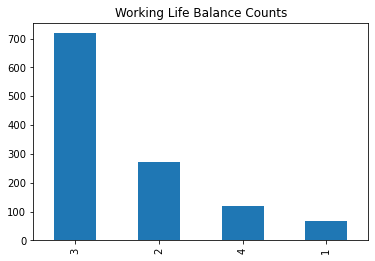

In [34]:
#barplot of Working Life Balance counts
train['WorkLifeBalance'].value_counts().plot(kind='bar', 
                                   title='Working Life Balance Counts')
plt.show()

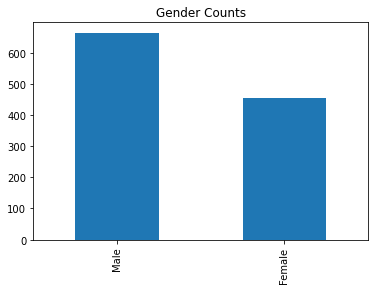

In [35]:
#barplot of Gender counts
train['Gender'].value_counts().plot(kind='bar', 
                                   title='Gender Counts')
plt.show()

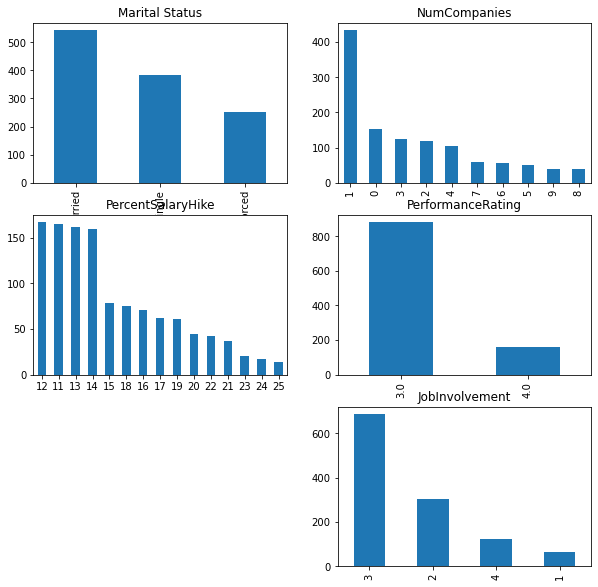

In [36]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

#MaritalStatus
plt.subplot2grid(fig_dims, (0, 0))
train['MaritalStatus'].value_counts().plot(kind='bar', 
                                   title='Marital Status')
#NumCompaniesWorked
plt.subplot2grid(fig_dims, (0, 1))
train['NumCompaniesWorked'].value_counts().plot(kind='bar', title='NumCompanies')

#PercentSalaryHiked
plt.subplot2grid(fig_dims, (1, 0))
train['PercentSalaryHike'].value_counts().plot(kind='bar', title='PercentSalaryHike')
plt.xticks(rotation=0)

#PerformanceRating
plt.subplot2grid(fig_dims, (1, 1))
train['PerformanceRating'].value_counts().plot(kind='bar', title='PerformanceRating')

#JobInvolvement
plt.subplot2grid(fig_dims, (2, 1))
train['JobInvolvement'].value_counts().plot(kind='bar', title='JobInvolvement')

plt.show()

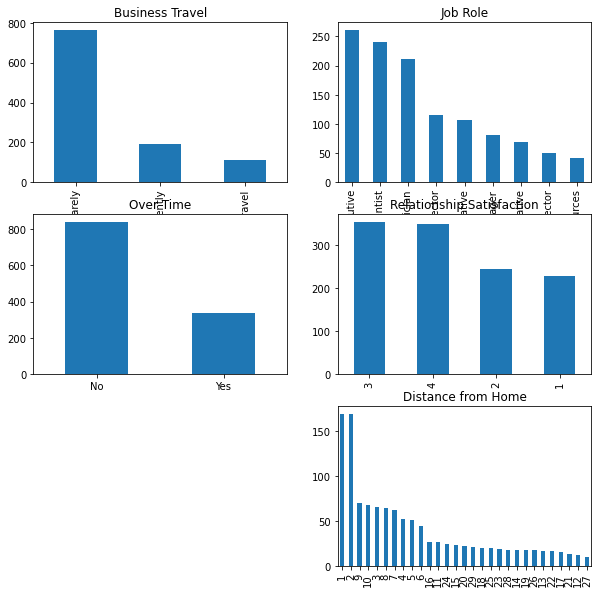

In [37]:
# Set up a grid of plots
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)

#BusinessTravel
plt.subplot2grid(fig_dims, (0, 0))
train['BusinessTravel'].value_counts().plot(kind='bar', 
                                   title='Business Travel')
#JobRole
plt.subplot2grid(fig_dims, (0, 1))
train['JobRole'].value_counts().plot(kind='bar', title='Job Role')

#OverTime
plt.subplot2grid(fig_dims, (1, 0))
train['OverTime'].value_counts().plot(kind='bar', title='Over Time')
plt.xticks(rotation=0)

#RelationshipSatisfaction
plt.subplot2grid(fig_dims, (1, 1))
train['RelationshipSatisfaction'].value_counts().plot(kind='bar', title='Relationship Satisfaction')

#DistanceFromHome
plt.subplot2grid(fig_dims, (2, 1))
train['DistanceFromHome'].value_counts().plot(kind='bar', title='Distance from Home')

plt.show()

In [38]:
# contingency table Department & Attrition
pdep_xt = pd.crosstab(train['Department'], train['Attrition'])
pdep_xt

Attrition,No,Yes
Department,,
Human Resources,36,10
Research & Development,659,110
Sales,289,72


In [39]:
# Normalize the cross tab to sum to 1:
pdep_xt_pct = pdep_xt.div(pdep_xt.sum(1).astype(float), axis=0) 
pdep_xt_pct

Attrition,No,Yes
Department,,
Human Resources,0.782609,0.217391
Research & Development,0.856957,0.143043
Sales,0.800554,0.199446


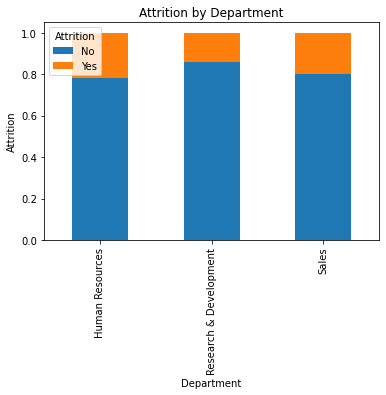

In [40]:
#barplot of Attrition by Department
pdep_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.show()

In [41]:
# contingency table Education & Attrition
education_xt = pd.crosstab(train['Education'], train['Attrition'])
education_xt

Attrition,No,Yes
Education,,
1,111,28
2,201,33
3,378,81
4,266,46
5,28,4


In [42]:
# Normalize the cross tab to sum to 1:
education_xt_pct = education_xt.div(education_xt.sum(1).astype(float), axis=0)
education_xt_pct

Attrition,No,Yes
Education,,
1,0.798561,0.201439
2,0.858974,0.141026
3,0.823529,0.176471
4,0.852564,0.147436
5,0.875000,0.125000


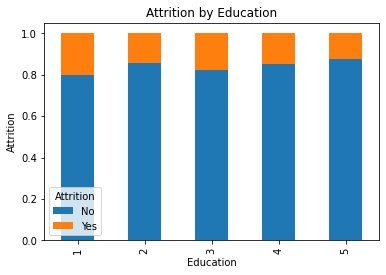

In [43]:
#barplot of Attrition by Education level

education_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by Education')
plt.xlabel('Education')
plt.ylabel('Attrition')
plt.show()

In [44]:
# contingency table of Attrition & Education Field
eduField_xt = pd.crosstab(train['EducationField'], train['Attrition'])
eduField_xt

Attrition,No,Yes
EducationField,,
Human Resources,16,5
Life Sciences,416,73
Marketing,97,28
Medical,319,51
Other,55,9
Technical Degree,81,26


In [45]:
# Normalize the cross tab to sum to 1:
eduField_xt_pct = eduField_xt.div(eduField_xt.sum(1).astype(float), axis=0)
eduField_xt_pct

Attrition,No,Yes
EducationField,,
Human Resources,0.761905,0.238095
Life Sciences,0.850716,0.149284
Marketing,0.776000,0.224000
Medical,0.862162,0.137838
Other,0.859375,0.140625
Technical Degree,0.757009,0.242991


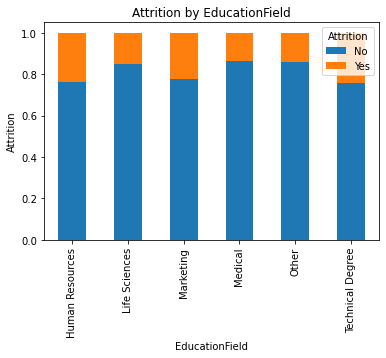

In [46]:
#barplot of Attrition by Education Field

eduField_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by EducationField')
plt.xlabel('EducationField')
plt.ylabel('Attrition')
plt.show()

In [48]:
# contingency table of Attrition & EnvironmentSatisfaction
satisfaction_xt = pd.crosstab(train['EnvironmentSatisfaction'], train['Attrition'])
satisfaction_xt

Attrition,No,Yes
EnvironmentSatisfaction,,
1,166,60
2,200,33
3,313,53
4,305,46


In [49]:
# Normalize the cross tab to sum to 1:
satisfaction_xt_pct = satisfaction_xt.div(satisfaction_xt.sum(1).astype(float), axis=0)
satisfaction_xt_pct

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.734513,0.265487
2,0.858369,0.141631
3,0.855191,0.144809
4,0.868946,0.131054


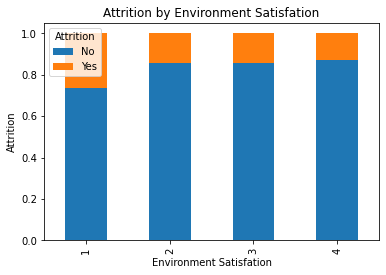

In [50]:
#barplot of Attrition by Environment Satisfaction
satisfaction_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by Environment Satisfation')
plt.xlabel('Environment Satisfation')
plt.ylabel('Attrition')
plt.show()

In [54]:
# contingency table of Attrition & StockOptionLevel

stockOption_xt = pd.crosstab(train['StockOptionLevel'], train['Attrition'])
stockOption_xt

Attrition,No,Yes
StockOptionLevel,,
0,387,127
1,426,44
2,115,10
3,56,11


In [56]:
# Normalize the cross tab to sum to 1:
stockOption_xt_pct = stockOption_xt.div(stockOption_xt.sum(1).astype(float), axis=0)
stockOption_xt_pct

Attrition,No,Yes
StockOptionLevel,,
0,0.752918,0.247082
1,0.906383,0.093617
2,0.920000,0.080000
3,0.835821,0.164179


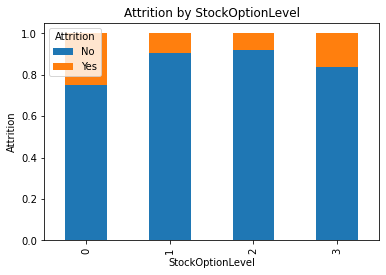

In [57]:
# barplot of Attrition by StockOptionLevel
stockOption_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by StockOptionLevel')
plt.xlabel('StockOptionLevel')
plt.ylabel('Attrition')
plt.show()

In [58]:
# contingency table of Attrition & WorkLifeBalance
balance_xt = pd.crosstab(train['WorkLifeBalance'], train['Attrition'])
balance_xt

Attrition,No,Yes
WorkLifeBalance,,
1,43,24
2,228,44
3,616,102
4,97,22


In [60]:
# Normalize the cross tab to sum to 1:
balance_xt_pct = balance_xt.div(balance_xt.sum(1).astype(int), axis=0)
balance_xt_pct

Attrition,No,Yes
WorkLifeBalance,,
1,0.641791,0.358209
2,0.838235,0.161765
3,0.857939,0.142061
4,0.815126,0.184874


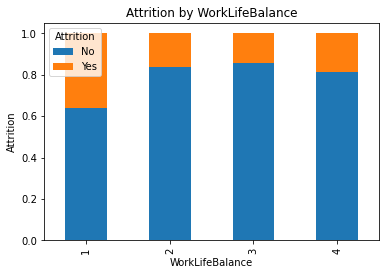

In [61]:
# barplot Attrition by WorkingLifeBalance

balance_xt_pct.plot(kind='bar', stacked=True, 
                   title='Attrition by WorkLifeBalance')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Attrition')
plt.show()

In [62]:
train['YearsInCurrentRole'].corr(train['YearsWithCurrManager']) #Pearson correlation between YearsInCurrentRole & YearsWithCurrManager

0.7107456776556681

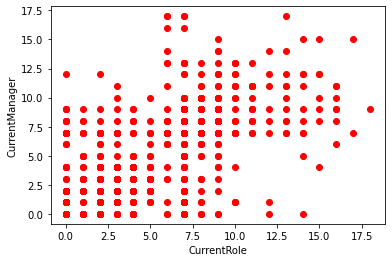

In [63]:
#scatterplot of YearsInCurrentRole & YearsWithCurrManager
plt.scatter(train['YearsInCurrentRole'], 
            train['YearsWithCurrManager'], color='r')
plt.xlabel('CurrentRole')
plt.ylabel('CurrentManager')
plt.show()

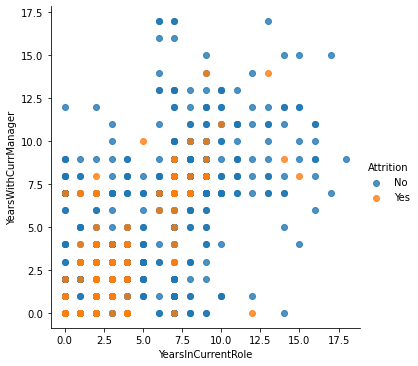

In [64]:
#scatterplot of YearsInCurrentRole & YearsWithCurrManager by Attrition
sns.lmplot(x='YearsInCurrentRole', y='YearsWithCurrManager', hue='Attrition', 
           data=train.loc[train['Attrition'].isin(['Yes', 'No'])], 
           fit_reg=False)

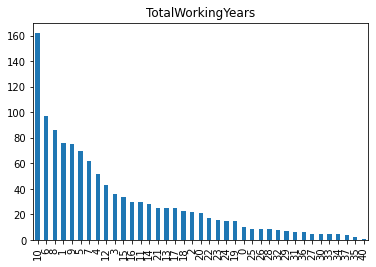

In [65]:
#barplot of TotalWorkingYears 
### è il grafico adatto?
train['TotalWorkingYears'].value_counts().plot(kind='bar', 
                                   title='TotalWorkingYears')
plt.show()

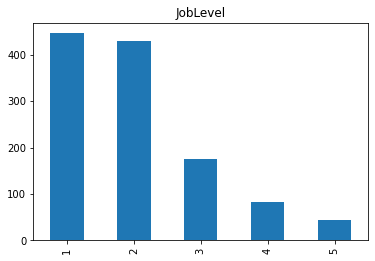

In [66]:
#barplot of JobLevel
train['JobLevel'].value_counts().plot(kind='bar', 
                                   title='JobLevel')
plt.show()

In [67]:
train['JobLevel'].mode()

0    1
dtype: int64

In [68]:
# Pearson correlation between TotalWorkingYears & JobLevel

train['TotalWorkingYears'].corr(train['JobLevel']) 

0.7744924102654909

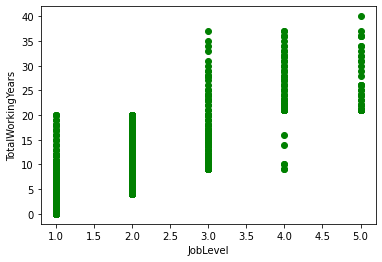

In [69]:
# Scatterplot of JobLevel & TotalWorkingYears
plt.scatter(train['JobLevel'], 
            train['TotalWorkingYears'], color='g')
plt.xlabel('JobLevel')
plt.ylabel('TotalWorkingYears')
plt.show()

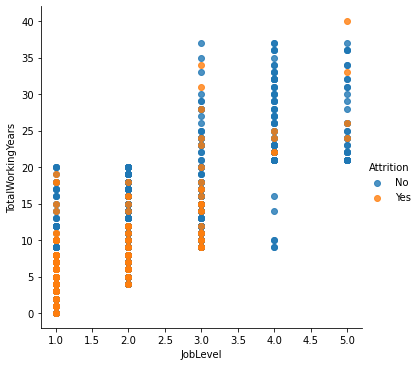

In [70]:
# Scatterplot of JobLevel & TotalWorkingYears by Attrition
sns.lmplot(x='JobLevel', y='TotalWorkingYears', hue='Attrition', 
           data=train.loc[train['Attrition'].isin(['Yes', 'No'])], 
           fit_reg=False)

In [71]:
# Pearson correlation between Age & MonthlyIncome

train['Age'].corr(train['MonthlyIncome']) 

0.4962746766277829

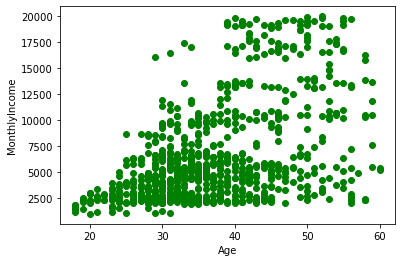

In [72]:
# Scatterplot of Age and MonthlyIncome by Attrition
plt.scatter(train['Age'], 
            train['MonthlyIncome'], color='g')
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.show()

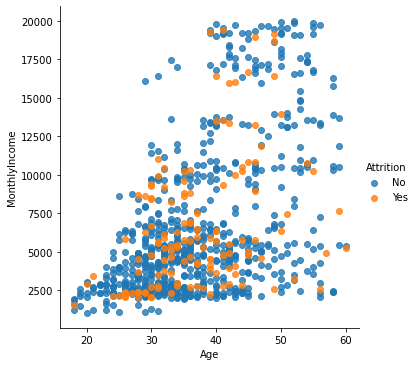

In [73]:
# Scatterplot of Age & MonthlyIncome by Attrition
sns.lmplot(x='Age', y='MonthlyIncome', hue='Attrition', 
           data=train.loc[train['Attrition'].isin(['Yes', 'No'])], 
           fit_reg=False)